In [ ]:
# Machine Learning in R
# Building a Classification model.

In [ ]:
# Load the 'iris' dataset.

library(datasets)
data(iris)
iris<-datasets::iris

# Load the package for machine learning.
# Caret - Classification and Regression Training

install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
# Does the dataset have any missing values?

sum(is.na(iris))

[1] 0

In [ ]:
# Seed number.
# Having this number ensures that same output is produced everytime you run the model. Or else, R assigns random values, which can give random results.

set.seed(100)

In [ ]:
# Data Splitting
# Training set = 80% abd testing set = 20%.

Training_index<-createDataPartition(iris$Species, p=0.8, list=FALSE)
Training_set<-iris[Training_index,]
Testing_set<-iris[-Training_index,]

# Training index consists of the indices of rows used for training.
# p=0.8 means 80% of data is used for training.
# list=false means output is in indices form and not a list.
# -training index means all those data except the trainig data are selected for testing.

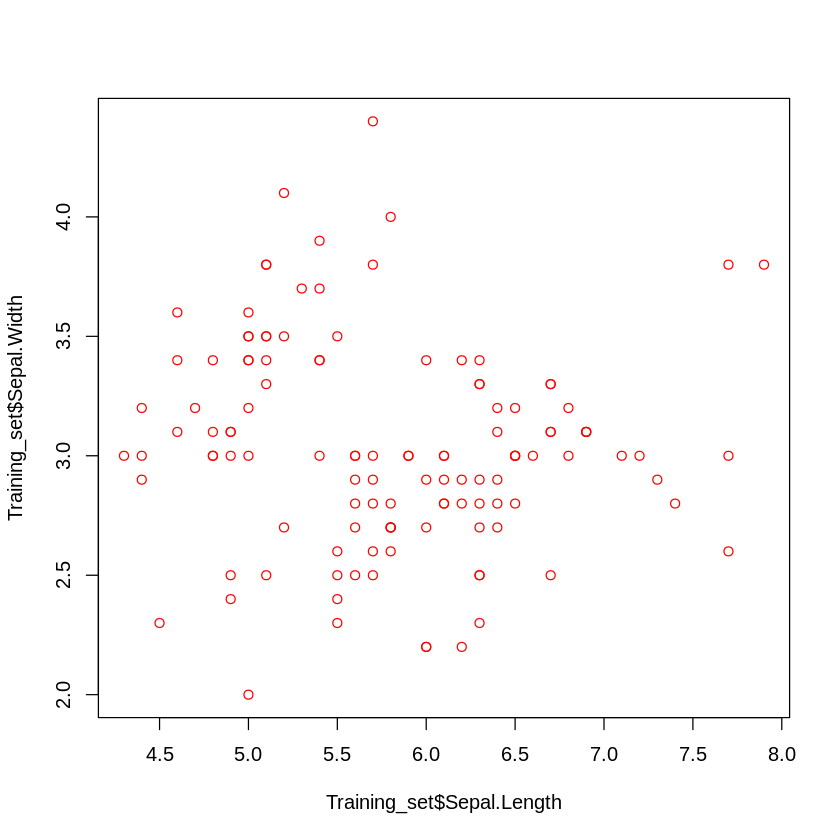

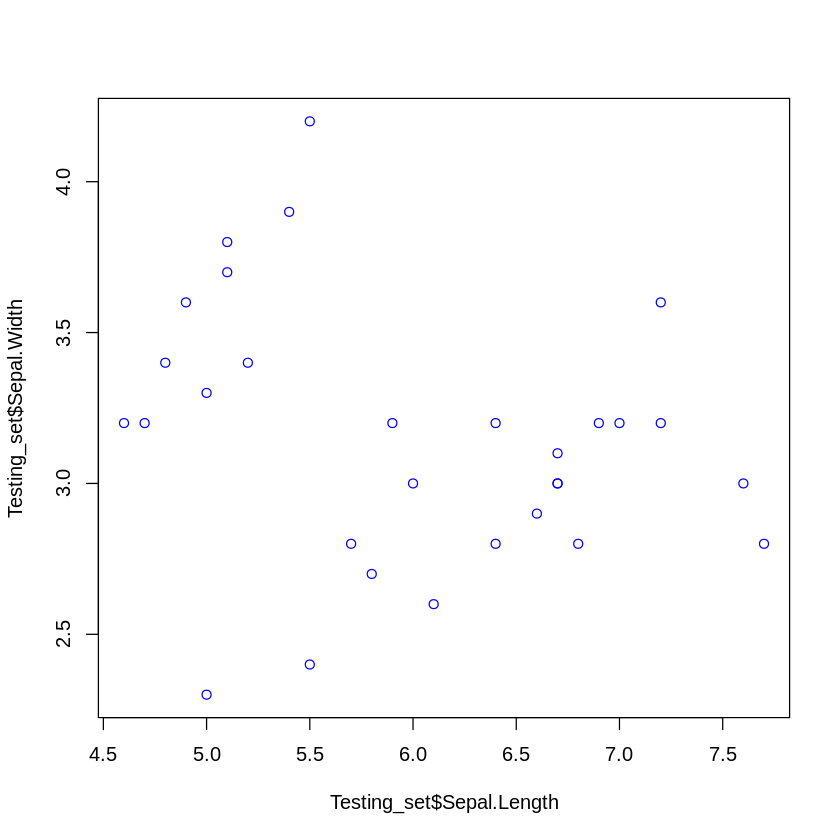

In [ ]:
# Compare the scatter plot of 80 and 20 datasubsets.

# For 80%,

plot(Training_set$Sepal.Length, Training_set$Sepal.Width, col="red")

# for 20%,

plot(Testing_set$Sepal.Length, Testing_set$Sepal.Width, col="blue")

# Arranging it side-by-side,

par(mfrow=c(1,2))

In [ ]:
# SVM model
# SVM refers to Support Vector machine model.
# The Caret package has many machine learning algorithms. We are using only one.

# Building training model
# This allows for prediction of outputs of both trainig and testing datasets.

install.packages("kernlab")
library(kernlab)

Model<-train(Species~.,
             data=Training_set,
             method="svmPoly",
             na.action=na.omit,
             preProcess=c("scale","center"),
             trControl=trainControl(method="none"),
             tuneGrid=data.frame(degree=1,scale=1,C=1)
)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# CV ( Cross Validation) model
# 10 subgroups of training set are made each having 12 flowers.
# We use 9 among them as training data and 1 subgroup as testing. We do this 10 times.

Model.cv<-train(Species~.,
             data=Training_set,
             method="svmPoly",
             na.action=na.omit,
             preProcess=c("scale","center"),
             trControl=trainControl(method="cv",number=10),
             tuneGrid=data.frame(degree=1,scale=1,C=1)
)

In [ ]:
# Model for prediction

model.training<-predict(Model, Training_set) # Apply model to make prediction on trainig set.
model.testing<-predict(Model, Testing_set) # Apply model to make prediction on testing set.
model.cv<-predict(Model.cv, Training_set) # Perform cross validation.

In [ ]:
# Testing model performance
# This is done by checking the confusion matrix and statistics.

model.training.confusion<-confusionMatrix(model.training, Training_set$Species)
model.testing.confusion<-confusionMatrix(model.testing, Testing_set$Species)
model.cv.confusion<-confusionMatrix(model.cv, Training_set$Species)

# Print the outputs
model.training.confusion
model.testing.confusion
model.cv.confusion

# Reference refers to actual.
# 1 virginica is misrepresented to be a versicolor.

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         40          0         0
  versicolor      0         38         1
  virginica       0          2        39

Overall Statistics
                                          
               Accuracy : 0.975           
                 95% CI : (0.9287, 0.9948)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9625          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9500           0.9750
Specificity                 1.0000            0.9875           0.9750
Pos Pred Value              1.0000            0.9744           0.9512
Neg Pred Value              1.0000            0.9753           0.9873
P

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          8         0
  virginica       0          2        10

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8000           1.0000
Specificity                 1.0000            1.0000           0.9000
Pos Pred Value              1.0000            1.0000           0.8333
Neg Pred Value              1.0000            0.9091           1.0000
P

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         40          0         0
  versicolor      0         38         1
  virginica       0          2        39

Overall Statistics
                                          
               Accuracy : 0.975           
                 95% CI : (0.9287, 0.9948)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9625          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9500           0.9750
Specificity                 1.0000            0.9875           0.9750
Pos Pred Value              1.0000            0.9744           0.9512
Neg Pred Value              1.0000            0.9753           0.9873
P

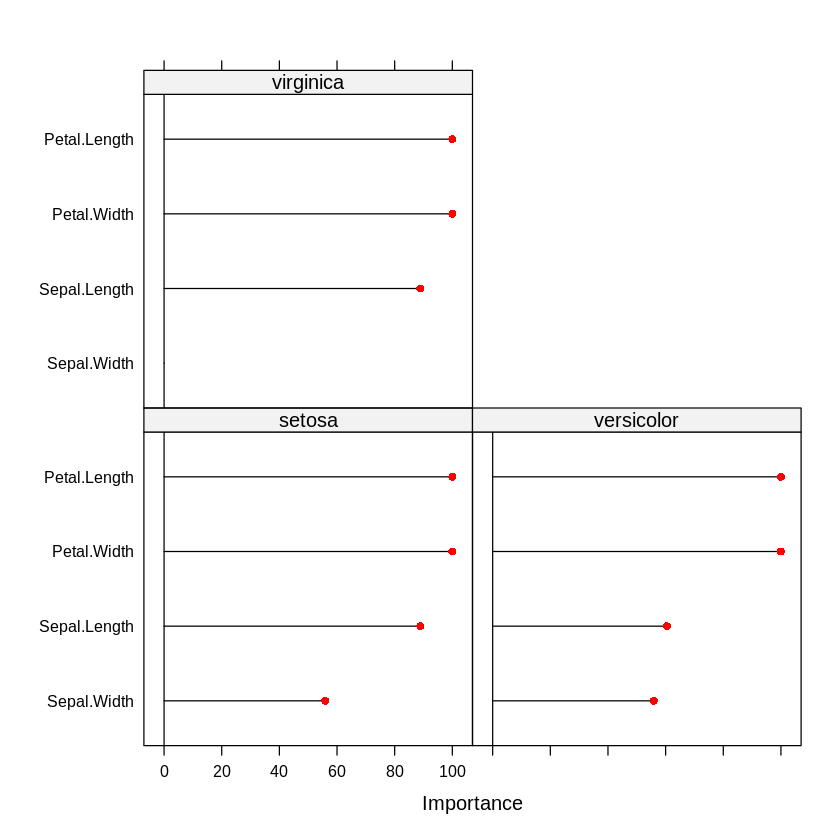

In [ ]:
# Feature Importance
# This shows which variable is the most important.

important<-varImp(Model)
plot(important,col="red")